In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [7]:
from sklearn import preprocessing

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [9]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [12]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [13]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [16]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6865 - accuracy: 0.6311 - val_loss: 0.6878 - val_accuracy: 0.5342
Epoch 2/100
32/32 [==============================] - 0s 976us/step - loss: 0.6794 - accuracy: 0.6164 - val_loss: 0.6837 - val_accuracy: 0.5297
Epoch 3/100
32/32 [==============================] - 0s 992us/step - loss: 0.6728 - accuracy: 0.6301 - val_loss: 0.6799 - val_accuracy: 0.5251
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6670 - accuracy: 0.6468 - val_loss: 0.6763 - val_accuracy: 0.5708
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6618 - accuracy: 0.6526 - val_loss: 0.6723 - val_accuracy: 0.6119
Epoch 6/100
32/32 [==============================] - 0s 992us/step - loss: 0.6567 - accuracy: 0.7025 - val_loss: 0.6685 - val_accuracy: 0.6119
Epoch 7/100
32/32 [==============================] - 0s 992us/step - loss: 0.6515 - accuracy: 0.7172 - val_loss: 0.6642 - val_accuracy: 0.6438
Epoch

32/32 [==============================] - 0s 976us/step - loss: 0.3250 - accuracy: 0.8748 - val_loss: 0.3537 - val_accuracy: 0.8813
Epoch 59/100
32/32 [==============================] - 0s 976us/step - loss: 0.3226 - accuracy: 0.8767 - val_loss: 0.3497 - val_accuracy: 0.8721
Epoch 60/100
32/32 [==============================] - 0s 960us/step - loss: 0.3203 - accuracy: 0.8787 - val_loss: 0.3505 - val_accuracy: 0.8813
Epoch 61/100
32/32 [==============================] - 0s 960us/step - loss: 0.3186 - accuracy: 0.8806 - val_loss: 0.3460 - val_accuracy: 0.8767
Epoch 62/100
32/32 [==============================] - 0s 944us/step - loss: 0.3161 - accuracy: 0.8787 - val_loss: 0.3406 - val_accuracy: 0.8630
Epoch 63/100
32/32 [==============================] - 0s 976us/step - loss: 0.3144 - accuracy: 0.8777 - val_loss: 0.3404 - val_accuracy: 0.8676
Epoch 64/100
32/32 [==============================] - 0s 960us/step - loss: 0.3127 - accuracy: 0.8796 - val_loss: 0.3372 - val_accuracy: 0.8630
Epoch

In [18]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 579us/step - loss: 0.3256 - accuracy: 0.8493


0.8493150472640991

In [19]:
import matplotlib.pyplot as plt

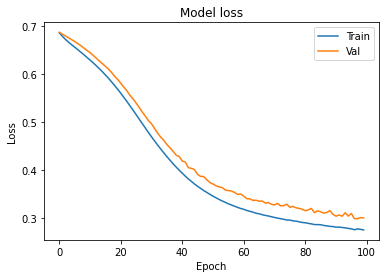

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [21]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

KeyError: 'acc'

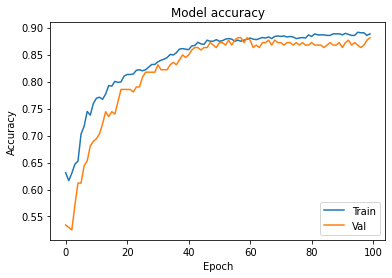

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [23]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 14ms/step - loss: 0.4642 - accuracy: 0.7896 - val_loss: 0.3613 - val_accuracy: 0.8402
Epoch 2/100
32/32 [==============================] - 0s 12ms/step - loss: 0.3405 - accuracy: 0.8630 - val_loss: 0.3323 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 0s 12ms/step - loss: 0.3271 - accuracy: 0.8669 - val_loss: 0.2975 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 0s 12ms/step - loss: 0.2776 - accuracy: 0.8914 - val_loss: 0.2762 - val_accuracy: 0.8721
Epoch 5/100
32/32 [==============================] - 0s 12ms/step - loss: 0.2899 - accuracy: 0.8953 - val_loss: 0.2983 - val_accuracy: 0.8584
Epoch 6/100
32/32 [==============================] - 0s 12ms/step - loss: 0.2710 - accuracy: 0.8894 - val_loss: 0.2858 - val_accuracy: 0.8813
Epoch 7/100
32/32 [==============================] - 0s 12ms/step - loss: 0.2785 - accuracy: 0.8904 - val_loss: 0.2767 - val_accuracy: 0.8676
Epoch 

32/32 [==============================] - 0s 12ms/step - loss: 0.1445 - accuracy: 0.9393 - val_loss: 0.3006 - val_accuracy: 0.8950
Epoch 59/100
32/32 [==============================] - 0s 12ms/step - loss: 0.1514 - accuracy: 0.9393 - val_loss: 0.3534 - val_accuracy: 0.8630
Epoch 60/100
32/32 [==============================] - 0s 12ms/step - loss: 0.1634 - accuracy: 0.9364 - val_loss: 0.3030 - val_accuracy: 0.8858
Epoch 61/100
32/32 [==============================] - 0s 12ms/step - loss: 0.1446 - accuracy: 0.9442 - val_loss: 0.3215 - val_accuracy: 0.8950
Epoch 62/100
32/32 [==============================] - 0s 12ms/step - loss: 0.1509 - accuracy: 0.9364 - val_loss: 0.3158 - val_accuracy: 0.8858
Epoch 63/100
32/32 [==============================] - 0s 12ms/step - loss: 0.1439 - accuracy: 0.9354 - val_loss: 0.3525 - val_accuracy: 0.9087
Epoch 64/100
32/32 [==============================] - 0s 12ms/step - loss: 0.1424 - accuracy: 0.9432 - val_loss: 0.3061 - val_accuracy: 0.8995
Epoch 65/100

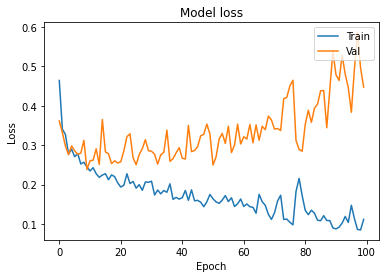

In [24]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

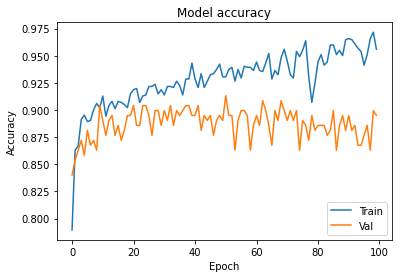

In [25]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [26]:
from keras.layers import Dropout
from keras import regularizers

In [27]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [28]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 20ms/step - loss: 14.2803 - accuracy: 0.6018 - val_loss: 4.0107 - val_accuracy: 0.5023
Epoch 2/100
32/32 [==============================] - 1s 17ms/step - loss: 1.6857 - accuracy: 0.8268 - val_loss: 0.6776 - val_accuracy: 0.8721
Epoch 3/100
32/32 [==============================] - 1s 17ms/step - loss: 0.5433 - accuracy: 0.8748 - val_loss: 0.5020 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 1s 17ms/step - loss: 0.5492 - accuracy: 0.8581 - val_loss: 0.5122 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 1s 17ms/step - loss: 0.4682 - accuracy: 0.8953 - val_loss: 0.4957 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 1s 17ms/step - loss: 0.4619 - accuracy: 0.8836 - val_loss: 0.4671 - val_accuracy: 0.8584
Epoch 7/100
32/32 [==============================] - 1s 17ms/step - loss: 0.4571 - accuracy: 0.8855 - val_loss: 0.4669 - val_accuracy: 0.8721
Epoch

32/32 [==============================] - 1s 18ms/step - loss: 0.4288 - accuracy: 0.8904 - val_loss: 0.4535 - val_accuracy: 0.8767
Epoch 59/100
32/32 [==============================] - 1s 17ms/step - loss: 0.4323 - accuracy: 0.8845 - val_loss: 0.4274 - val_accuracy: 0.8858
Epoch 60/100
32/32 [==============================] - 1s 17ms/step - loss: 0.4280 - accuracy: 0.8885 - val_loss: 0.4257 - val_accuracy: 0.8813
Epoch 61/100
32/32 [==============================] - 1s 17ms/step - loss: 0.4279 - accuracy: 0.8933 - val_loss: 0.4423 - val_accuracy: 0.8813
Epoch 62/100
32/32 [==============================] - 1s 18ms/step - loss: 0.4295 - accuracy: 0.8924 - val_loss: 0.4357 - val_accuracy: 0.8813
Epoch 63/100
32/32 [==============================] - 1s 17ms/step - loss: 0.4336 - accuracy: 0.8875 - val_loss: 0.4469 - val_accuracy: 0.8813
Epoch 64/100
32/32 [==============================] - 1s 17ms/step - loss: 0.4575 - accuracy: 0.8787 - val_loss: 0.4447 - val_accuracy: 0.8858
Epoch 65/100

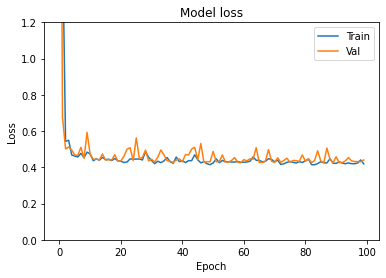

In [29]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

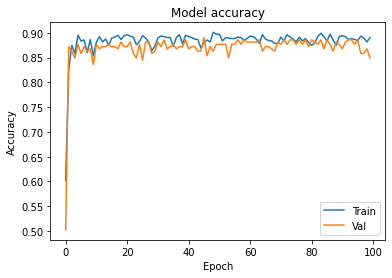

In [30]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [31]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [32]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [33]:
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


In [34]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

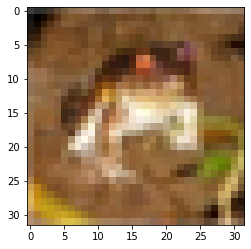

In [36]:
img = plt.imshow(x_train[0])

In [37]:
print('The label is:', y_train[0])

The label is: [6]


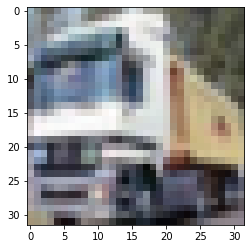

In [38]:
img = plt.imshow(x_train[1])

In [39]:
print('The label is:', y_train[1])

The label is: [9]


In [40]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

AttributeError: module 'keras.utils' has no attribute 'to_categorical'

In [41]:
import keras
y_train_one_hot = keras.utils.np_utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.np_utils.to_categorical(y_test, 10)

In [42]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [43]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [44]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [46]:
model = Sequential()

In [47]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

In [48]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [49]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [50]:
model.add(Dropout(0.25))

In [51]:
model.add(Flatten())

In [52]:
model.add(Dense(512, activation='relu'))

In [53]:
model.add(Dropout(0.5))

In [54]:
model.add(Dense(10, activation='softmax'))

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense_13 (Dense)            (None, 512)               4194816   
                                                      

In [56]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [57]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 43s 34ms/step - loss: 1.4609 - accuracy: 0.4705 - val_loss: 1.1245 - val_accuracy: 0.5989
Epoch 2/20
1250/1250 [==============================] - 42s 33ms/step - loss: 1.0946 - accuracy: 0.6101 - val_loss: 0.9727 - val_accuracy: 0.6623
Epoch 3/20
1250/1250 [==============================] - 42s 33ms/step - loss: 0.9457 - accuracy: 0.6668 - val_loss: 0.9456 - val_accuracy: 0.6742
Epoch 4/20
1250/1250 [==============================] - 41s 33ms/step - loss: 0.8383 - accuracy: 0.7023 - val_loss: 0.8844 - val_accuracy: 0.6916
Epoch 5/20
1250/1250 [==============================] - 42s 33ms/step - loss: 0.7436 - accuracy: 0.7375 - val_loss: 0.8754 - val_accuracy: 0.6996
Epoch 6/20
1250/1250 [==============================] - 42s 34ms/step - loss: 0.6601 - accuracy: 0.7663 - val_loss: 0.8749 - val_accuracy: 0.7049
Epoch 7/20
1250/1250 [==============================] - 42s 33ms/step - loss: 0.5863 - accuracy: 0.7924 - val_loss: 0.8795 -

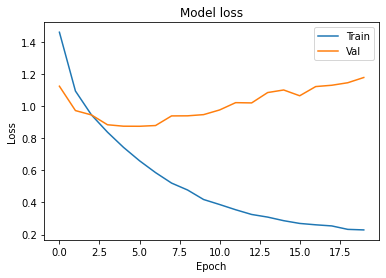

In [58]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

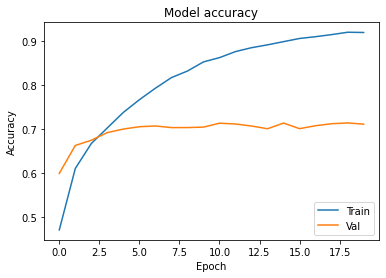

In [59]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [60]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 3s 8ms/step - loss: 1.1845 - accuracy: 0.7009


0.7009000182151794

In [61]:
model.save('my_cifar10_model.h5')

In [62]:
my_image = plt.imread("cat.jpg")

In [63]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

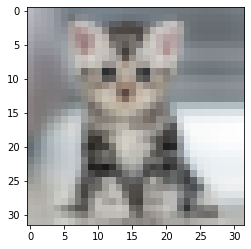

In [64]:
img = plt.imshow(my_image_resized)

In [65]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [66]:
probabilities

array([[2.2244996e-04, 7.5754184e-07, 3.4916154e-04, 3.0922583e-01,
        5.6726420e-03, 3.5504904e-01, 9.5645162e-05, 3.2934597e-01,
        1.0674197e-05, 2.7843622e-05]], dtype=float32)

In [67]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: dog -- Probability: 0.35504904
Second most likely class: horse -- Probability: 0.32934597
Third most likely class: cat -- Probability: 0.30922583
Fourth most likely class: deer -- Probability: 0.005672642
Fifth most likely class: bird -- Probability: 0.00034916154
